In [22]:
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
refugee = 'resettlement_data.csv'

happy = '2017.csv'

iso = 'ISOs-clean.csv'

refugee_df = pd.read_csv(refugee)
happiness_df = pd.read_csv(happy)
iso_df = pd.read_csv(iso)

In [4]:
iso_df.head()

,Country,ISO
0,Norway,NOR
1,Denmark,DNK
2,Iceland,ISL
3,Switzerland,CHE
4,Finland,FIN


In [5]:
refugee_df.head()

,Year,Country of Origin (ISO),Country of Origin,Country of Resettlement (ISO),Country of Resettlement,Total submissions (persons)
0,2017,ERI,Eritrea,NOR,Norway,8
1,2017,SOM,Somalia,NOR,Norway,9
2,2017,IRQ,Iraq,IRL,Ireland,5
3,2017,SYR,Syrian Arab Rep.,LUX,Luxembourg,216
4,2017,COD,Dem. Rep. of the Congo,FIN,Finland,180


In [6]:
clean_happiness_df = happiness_df.drop(columns=(["Whisker.high","Whisker.low","Dystopia.Residual"]))

In [7]:
refugee_df.head()

,Year,Country of Origin (ISO),Country of Origin,Country of Resettlement (ISO),Country of Resettlement,Total submissions (persons)
0,2017,ERI,Eritrea,NOR,Norway,8
1,2017,SOM,Somalia,NOR,Norway,9
2,2017,IRQ,Iraq,IRL,Ireland,5
3,2017,SYR,Syrian Arab Rep.,LUX,Luxembourg,216
4,2017,COD,Dem. Rep. of the Congo,FIN,Finland,180


In [8]:
refugee_df["Country of Origin"].unique()

array(['Eritrea', 'Somalia', 'Iraq', 'Syrian Arab Rep.',
       'Dem. Rep. of the Congo', 'Sudan', 'All others',
       'Iran (Islamic Rep. of)', 'Afghanistan', 'Myanmar', 'Bhutan'],
      dtype=object)

In [9]:
clean_refugee_df = refugee_df.rename(columns={"Country of Origin (ISO)":"Origin_ISO",\
                                             "Country of Origin":"Origin_Country",\
                                             "Country of Resettlement (ISO)":"Resettlement_ISO",\
                                              "Country of Resettlement":"Resettlement_Country",\
                                             "Total submissions (persons)":"Total_Resettled"})

In [10]:
clean_refugee_df.head()

,Year,Origin_ISO,Origin_Country,Resettlement_ISO,Resettlement_Country,Total_Resettled
0,2017,ERI,Eritrea,NOR,Norway,8
1,2017,SOM,Somalia,NOR,Norway,9
2,2017,IRQ,Iraq,IRL,Ireland,5
3,2017,SYR,Syrian Arab Rep.,LUX,Luxembourg,216
4,2017,COD,Dem. Rep. of the Congo,FIN,Finland,180


In [11]:
clean_refugee_df.to_csv('clean_resettlement_df.csv')

In [17]:
numbers = clean_refugee_df.groupby(clean_refugee_df['Origin_ISO']).sum()

In [18]:
numbers = numbers.reset_index()

In [20]:
numbers = numbers.drop(columns=(["Year"]))
numbers

,Origin_ISO,Total_Resettled
0,AFG,2172
1,All others,5583
2,BTN,139
3,COD,12936
4,ERI,2947
5,IRN,785
6,IRQ,3040
7,MMR,5346
8,SDN,2324
9,SOM,2584


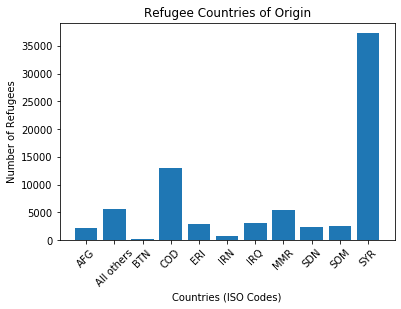

In [31]:
plt.bar(numbers["Origin_ISO"], numbers["Total_Resettled"])

plt.xticks(rotation = 45)
plt.title("Refugee Countries of Origin")
plt.xlabel("Countries (ISO Codes)")
plt.ylabel("Number of Refugees")

plt.savefig("refugee_numbers.png")